In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install watermark
%load_ext watermark
%watermark -p tensorflow,skimage,matplotlib,numpy,random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.4 MB/s eta 0:00:00
tensorflow: 2.18.0
skimage   : 0.25.2
matplotlib: 3.10.0
numpy     : 2.0.2
random    : unknown



In [ ]:
import tensorflow as tf
from skimage import transform
from skimage import data
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.color import rgb2gray
import random
from skimage.io import imread
from skimage.transform import resize

In [ ]:
array1 = tf.constant([1,2,3,4])
array2 = tf.constant([5,6,7,8])
result = tf.multiply(array1, array2)
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [ ]:
# initialize the constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# print the result
print(result.numpy())

[ 5 12 21 32]


# Loading And Exploring The Data

In [ ]:
def load_data(data_directory, img_size=(32, 32)): # Resize all images to 32x32
    # Get all subdirectories of data_directory. Each represents a label.
    directories = [ d for d in os.listdir(data_directory)
                  if os.path.isdir(os.path.join(data_directory, d))]
    # loop through the label directories and collect the data in
    # two lists, labels and images'
    labels =[]
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f)
                for f in os.listdir(label_directory)
                if f.endswith(".ppm")]
        for f in file_names:
            image = imread(f)
            img_resized = resize(image, img_size)
            images.append(img_resized)
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/content/drive/MyDrive/Belgian Traffic signs"
train_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC_Training/Training")
test_data_directory = os.path.join(ROOT_PATH, "BelgiumTSC_Testing/Testing")

images, labels = load_data(train_data_directory)



In [ ]:
images_array = np.array(images)
labels_array = np.array(labels)

# print the images dimensions
print(images_array.ndim)

# print the number of images elements
print(images_array.size)

# print the first instance of the images
images_array[0]

# print the labels dimensions
print(labels_array.ndim)

# print the number of labels elements
print(labels_array.size)

# coun the number of labels
print(len(set(labels_array)))

4
14054400
1
4575
62


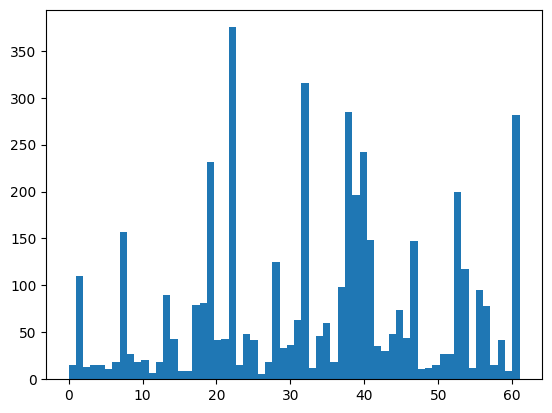

In [ ]:
# make a histogram with 62 bins of labels data
plt.hist(labels, bins=62)

# show the plot
plt.show()

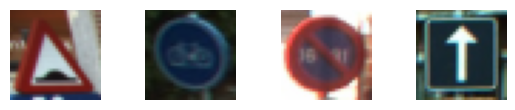

In [ ]:
# Determine the (random) indexes of the images you want to see
traffic_signs = [300, 2250, 3650, 4000]

# fill out the subplots with the random images that you defined
for i in range(len(traffic_signs)):
  plt.subplot(1, 4, i+1)
  plt.axis("off")
  plt.imshow(images[traffic_signs[i]])
  plt.subplots_adjust(wspace=0.5)

plt.show()


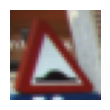

shape:(32, 32, 3), min:0.06969680299599118, max:0.9046073305654755


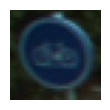

shape:(32, 32, 3), min:0.005735140329544045, max:0.6589650973450016


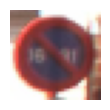

shape:(32, 32, 3), min:0.14361658541347644, max:1.0


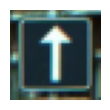

shape:(32, 32, 3), min:0.022421451312551972, max:0.9997789474487515


In [ ]:
# Determine the (random) indexes of the images you want to see
traffic_signs = [300, 2250, 3650, 4000]

# fill out the subplots with the random images and add shapes, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape:{0}, min:{1}, max:{2}".format(images[traffic_signs[i]].shape,
                                               images[traffic_signs[i]].min(),
                                               images[traffic_signs[i]].max()))

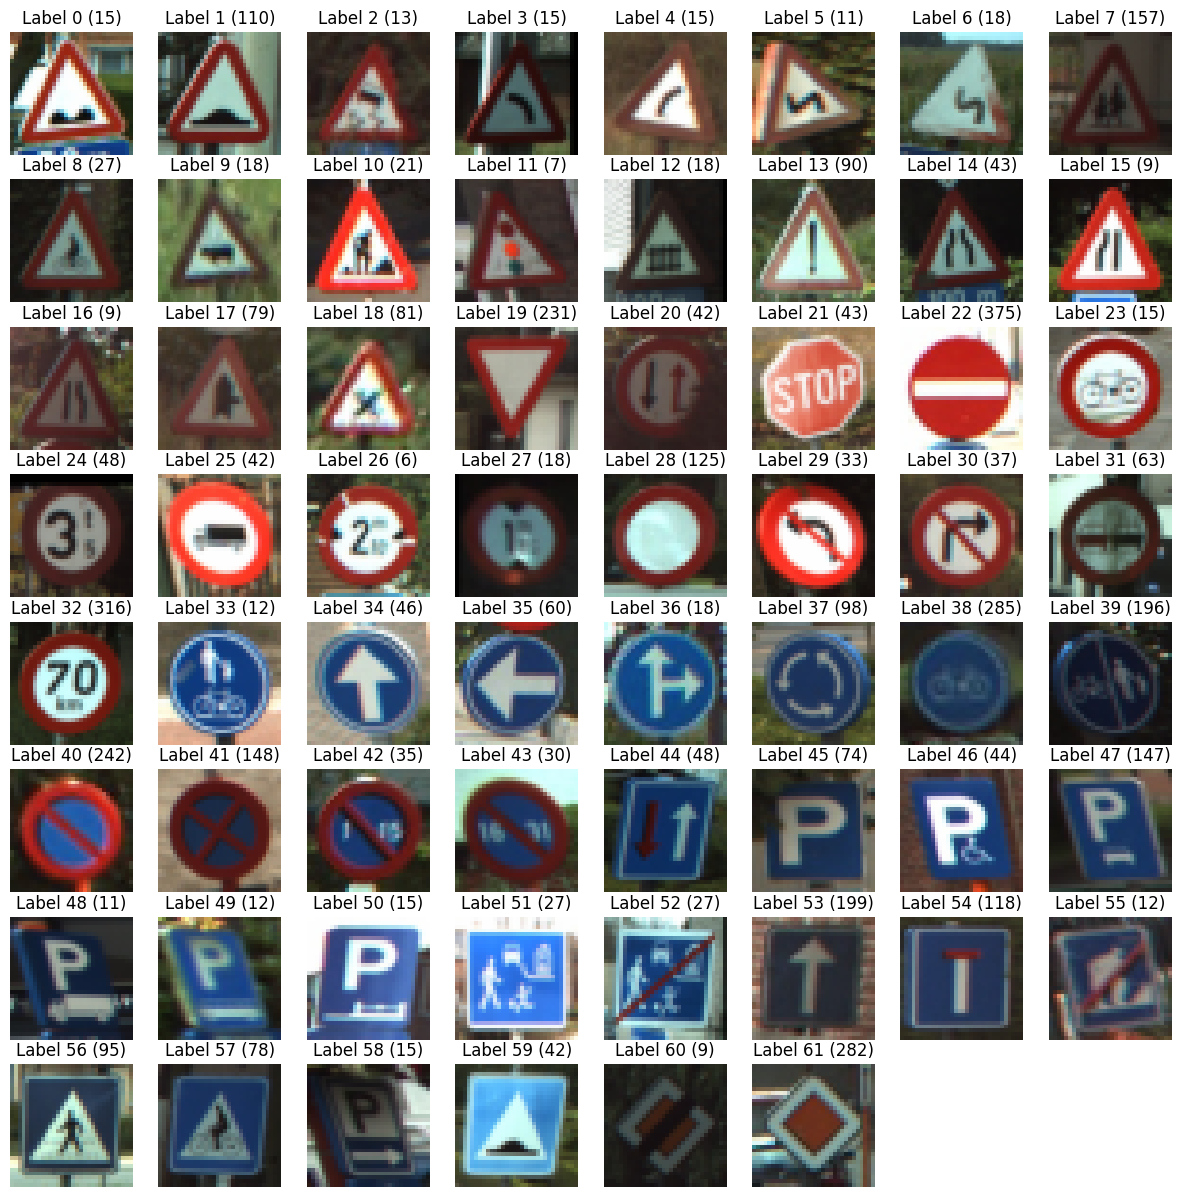

In [ ]:
# get the unique labels
unique_labels = set(labels)

# initialize the figure
plt.figure(figsize=(15, 15))

# set a counter
i = 1

# for each unique label:
for label in unique_labels:
  # pick the first image for each label
  image = images[labels.index(label)]
  # define 64 subplots
  plt.subplot(8, 8, i)
  # Do not include axes
  plt.axis("off")
  # Add title to each subplot]
  plt.title("Label {0} ({1})".format(label, labels.count(label)))
  # Add 1 to the counter
  i += 1
  # And you plot this first image
  plt.imshow(image)

# show the plot
plt.show()

# Feature Extraction
Rescaling Images

In [ ]:
# Rescale the images in the images array
images28 = [transform.resize(image, (28, 28)) for image in images]
images28 = np.array(images28)
print(images28.shape)


(4575, 28, 28, 3)


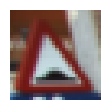

shape:(28, 28, 3), min:0.07331900500536964, max:0.8867622300890236


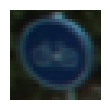

shape:(28, 28, 3), min:0.013417314724849576, max:0.5872053058245585


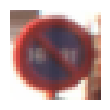

shape:(28, 28, 3), min:0.16058513189151807, max:1.0


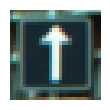

shape:(28, 28, 3), min:0.02884823119053744, max:0.9989242526620283


In [ ]:
# Determine the (random) indexes of the images you want to see
traffic_signs = [300, 2250, 3650, 4000]

# fill out the subplots with the random images and add shapes, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape:{0}, min:{1}, max:{2}".format(images28[traffic_signs[i]].shape,
                                               images28[traffic_signs[i]].min(),
                                               images28[traffic_signs[i]].max()))

**Image Conversion to Grayscale**

In [ ]:
# convert images28 to an array and grayscale
images28 = rgb2gray(np.array(images28))

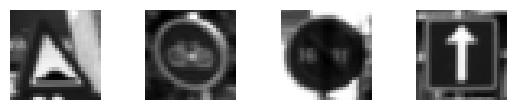

In [ ]:
# Determine the (random) indexes of the images you want to see
traffic_signs = [300, 2250, 3650, 4000]

# fill out the subplots with the random images that you defined
for i in range(len(traffic_signs)):
  plt.subplot(1, 4, i+1)
  plt.axis("off")
  plt.imshow(images28[traffic_signs[i]], cmap='gray')
  plt.subplots_adjust(wspace=0.5)

plt.show()


# Deep Learning with Tensorflow
**Modeling The Neural Network**

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # first convolutional layer: 32 filters , 3 x 3 kernel
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # second convolutional layer: 64 filters , 3 x 3 kernel
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

   # Flatten input images
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), # fully connected layers
    tf.keras.layers.Dense(62, activation='softmax') # output layer (62 classes, softmax for probabilities)


])

# compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 62)                  │           7,998 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,742 (905.24 KB)

 Trainable params: 231,742 (905.24 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [ ]:
model.fit(images28, np.array(labels), epochs=10, batch_size=32, validation_data=(images28, np.array(labels)))

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.2072 - loss: 3.4310 - val_accuracy: 0.5904 - val_loss: 1.6564
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.6831 - loss: 1.3045 - val_accuracy: 0.8258 - val_loss: 0.6660
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.8251 - loss: 0.6281 - val_accuracy: 0.8848 - val_loss: 0.4159
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.8925 - loss: 0.3815 - val_accuracy: 0.9145 - val_loss: 0.3012
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9085 - loss: 0.2920 - val_accuracy: 0.9473 - val_loss: 0.1749
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9517 - loss: 0.1705 - val_accuracy: 0.9567 - val_loss: 0.1642
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9595 - loss: 0.1421 - val_accuracy: 0.9707 - val_loss: 0.1094
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 0.9721 - loss: 0.0995 - val_acc

# Evaluating The Neural Network

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
True Labels: [45 32 40 41 22 45 44 38 28 56]
Predicted Labels: [45 32 40 41 22 45 44 38 28 56]


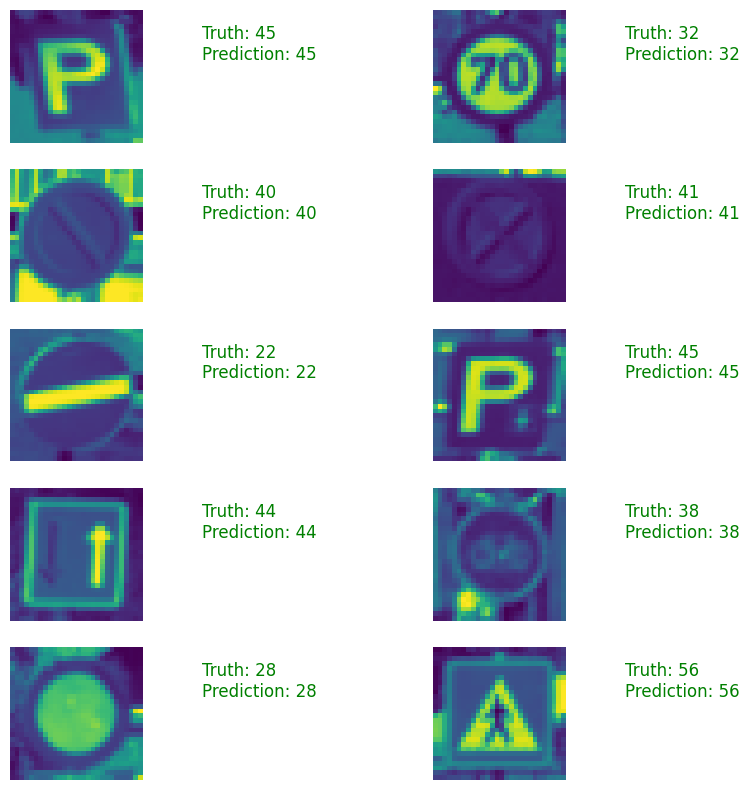

In [ ]:
# pick 10 random images
sample_indexes = random.sample(range(len(images28)), 10)
sample_images= np.array([images28[i] for i in sample_indexes])
sample_labels = np.array([labels[i] for i in sample_indexes])

# Get predictions
predicted_labels = np.argmax(model.predict(sample_images), axis=1) # Get predictions with the highest class

# print true and predicted labels
print("True Labels:", sample_labels)
print("Predicted Labels:", predicted_labels)

# Display predictions with ground truth
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
  truth = sample_labels[i]
  prediction = predicted_labels[i]
  plt.subplot(5, 2, i+1)
  plt.axis("off")
  color = 'green' if truth == prediction else 'red'
  plt.text(40, 10, 'Truth: {0}\nPrediction: {1}'.format(truth, prediction), fontsize=12, color=color)
  plt.imshow(sample_images[i])

# show plot
plt.show()

In [ ]:
# Load the Test data
test_images, test_labels = load_data(test_data_directory)

# Transform the test images
test_images28 = [transform.resize(image, (28,28)) for image in test_images]

# Convert the images to grayscale
test_images28 = rgb2gray(np.array(test_images28))

# Run the predictions against the full test set
predicted_labels = np.argmax(model.predict(test_images28), axis=1)

# count correct matches
match_count = np.sum(predicted_labels == test_labels)

# compute the accuracy
accuracy = match_count/len(test_labels)

# print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Accuracy: 0.903
